In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler

In [20]:
dataframe = pd.read_csv('output2.csv',usecols=[1]).iloc[:8000,:].clip(lower = 0)
dataframe

,Plasma_current
0,0.0000
1,1.3591
2,5.7585
3,11.6940
4,17.8730
...,...
7995,0.0000
7996,0.0000
7997,0.0000
7998,0.0000


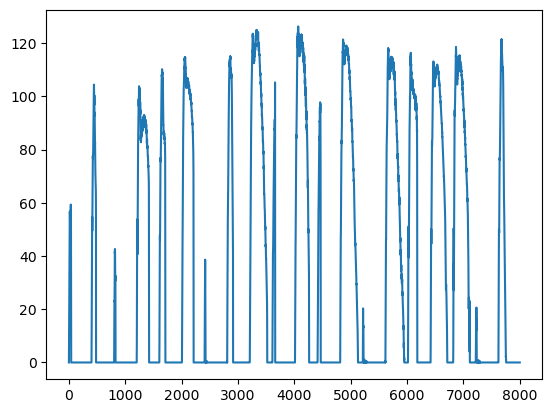

In [21]:
plt.plot(dataframe)

In [23]:
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset.shape

(8000, 1)

In [29]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataframe)

In [31]:
train_size = int(len(dataset)*0.80)
test_size = len(dataset) - train_size

In [37]:
traindata = dataset[:train_size,:]
testdata = dataset[train_size:,:]
testdata.shape

(1600, 1)

In [39]:
time_window , forecasting_term = 10,20

In [45]:
def to_sequences(dataset,time_window,forecasting_term):
    X = []
    y= []
    
    for i in range(len(dataset) - time_window - forecasting_term):
        X.append(dataset[i:i + time_window,:].reshape(-1,1))
        y.append(dataset[i + time_window:i+ time_window + forecasting_term,:].reshape(-1,1))
        
    return np.array(X),np.array(y)

In [46]:
trainX, trainY = to_sequences(traindata,time_window,forecasting_term)
trainY.shape

(6370, 20, 1)